In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_excel('tmdb_5000_movies.xlsx')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800.0,NaN,NaN,NaN,NaN,NaN,NaN
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,NaN,NaN,NaN,NaN,NaN,NaN
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466.0,NaN,NaN,NaN,NaN,NaN,NaN
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.6,9106.0,NaN,NaN,NaN,NaN,NaN,NaN
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.1,2124.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df = df[['budget', 'genres', 'popularity', 'production_companies', 'revenue', 'vote_average', 'vote_count']]
df.head()

,budget,genres,popularity,production_companies,revenue,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2787965087,7.2,11800.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",961000000,6.9,4500.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",880674609,6.3,4466.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",1084939099,7.6,9106.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",284139100,6.1,2124.0


In [52]:
import ast
def nilai_pertama(kolom):
    if kolom:
        try:
            kolom = kolom.replace('\\"', "'")
            kolom_list = ast.literal_eval(kolom)
            if kolom_list:
                return kolom_list[0]['name']
        except (SyntaxError, ValueError):
            return None
        return None
    
df['genre'] = df['genres'].apply(nilai_pertama)
df['production_company'] = df['production_companies'].apply(nilai_pertama)
df.drop(columns=['genres', 'production_companies'], inplace=True)

In [53]:
df.head()

,budget,popularity,revenue,vote_average,vote_count,genre,production_company
0,237000000,150.437577,2787965087,7.2,11800.0,Action,Ingenious Film Partners
1,300000000,139.082615,961000000,6.9,4500.0,Adventure,Walt Disney Pictures
2,245000000,107.376788,880674609,6.3,4466.0,Action,Columbia Pictures
3,250000000,112.31295,1084939099,7.6,9106.0,Action,Legendary Pictures
4,260000000,43.926995,284139100,6.1,2124.0,Action,Walt Disney Pictures


In [54]:
df.dtypes

budget                  int64
popularity             object
revenue                object
vote_average           object
vote_count            float64
genre                  object
production_company     object
dtype: object

In [55]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

In [56]:
# def label_encoding(df):
#     mappings = {} #membuat dictionary untuk menyimpan nilai unik
#     for col in df.select_dtypes(include='object'): #for loop untuk kolom bertipe object
#         unique_labels = df[col].unique() #mengambil nilai untuk tiap kolom
#         value_to_label = {value: key for key, value in enumerate(unique_labels)} #membuat dictionary yang memetakan nilai unik ke angka
#         mappings[col] = value_to_label #menyimpan hasil mapping
#         df[col] = df[col].map(value_to_label) #mapping
#     return df, mappings

# df, mappings = label_encoding(df)

In [57]:
df.head()

,budget,popularity,revenue,vote_average,vote_count,genre,production_company
0,237000000,150.437577,2.787965e+09,7.2,11800.0,Action,Ingenious Film Partners
1,300000000,139.082615,9.610000e+08,6.9,4500.0,Adventure,Walt Disney Pictures
2,245000000,107.376788,8.806746e+08,6.3,4466.0,Action,Columbia Pictures
3,250000000,112.312950,1.084939e+09,7.6,9106.0,Action,Legendary Pictures
4,260000000,43.926995,2.841391e+08,6.1,2124.0,Action,Walt Disney Pictures


In [58]:
df['revenue'][0]

np.float64(2787965087.0)

In [59]:
df.dtypes

budget                  int64
popularity            float64
revenue               float64
vote_average          float64
vote_count            float64
genre                  object
production_company     object
dtype: object

In [60]:
df.shape

(4803, 7)

In [11]:
df.isna().sum()

budget                  0
popularity              1
revenue                 2
vote_average            1
vote_count              0
genre                  28
production_company    353
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.dtypes

budget                  int64
popularity            float64
revenue               float64
vote_average          float64
vote_count            float64
genre                  object
production_company     object
dtype: object

<Axes: >

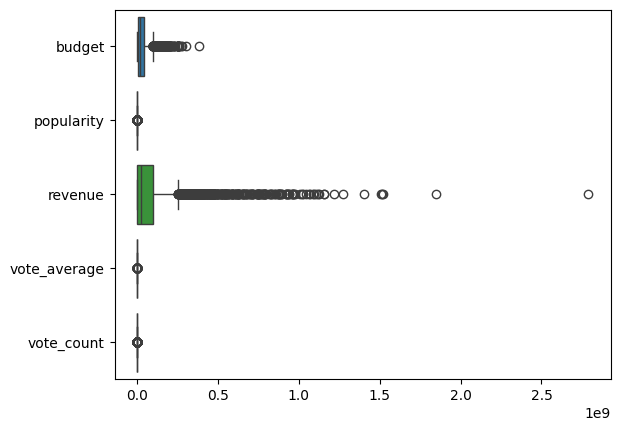

In [15]:
sns.boxplot(df, orient='h')

In [16]:
columns_to_normalize = ['budget', 'popularity', 'revenue', 'vote_average', 'vote_count']

# for col in columns_to_normalize:
#     min_value = df[col].min()
#     max_value = df[col].max()
#     df[col] = (df[col] - min_value) / (max_value - min_value)

In [17]:
df.head()

,budget,popularity,revenue,vote_average,vote_count,genre,production_company
0,237000000,150.437577,2.787965e+09,7.2,11800.0,Action,Ingenious Film Partners
1,300000000,139.082615,9.610000e+08,6.9,4500.0,Adventure,Walt Disney Pictures
2,245000000,107.376788,8.806746e+08,6.3,4466.0,Action,Columbia Pictures
3,250000000,112.312950,1.084939e+09,7.6,9106.0,Action,Legendary Pictures
4,260000000,43.926995,2.841391e+08,6.1,2124.0,Action,Walt Disney Pictures


<Axes: >

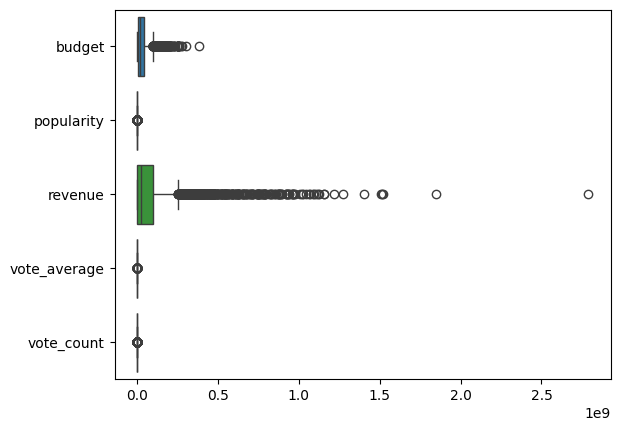

In [18]:
sns.boxplot(df, orient='h')

In [19]:
for col in columns_to_normalize:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    mean_value = df[col].mean()
    df[col] = df[col].apply(lambda x : mean_value if x < lwr or x > upr else x)

<Axes: >

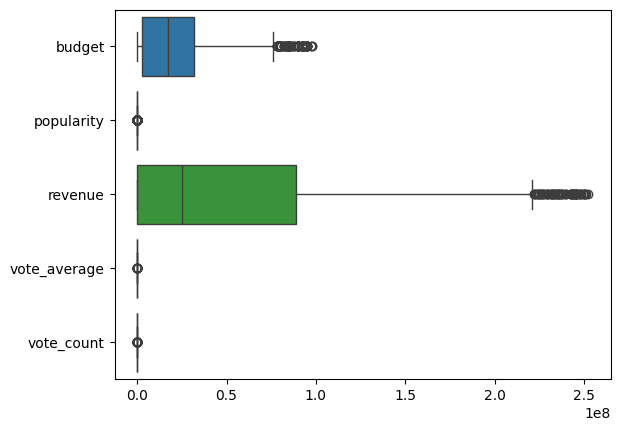

In [20]:
sns.boxplot(df, orient='h')

In [21]:
for col in columns_to_normalize:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    df = df[(df[col] >= lwr) & (df[col] <= upr)]

<Axes: >

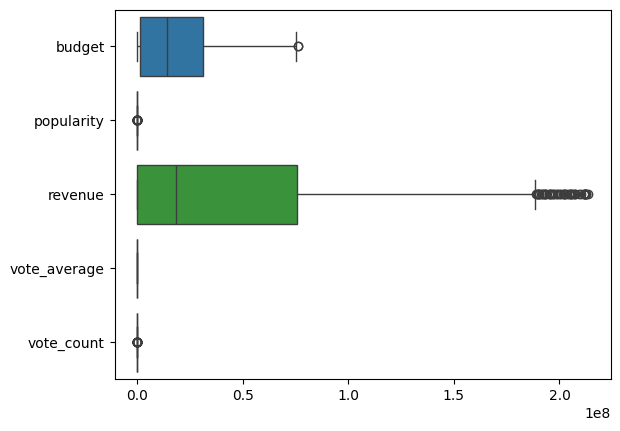

In [22]:
sns.boxplot(df, orient='h')

In [23]:
df.head()

,budget,popularity,revenue,vote_average,vote_count,genre,production_company
0,3.127968e+07,23.083257,8.877587e+07,7.2,744.162132,Action,Ingenious Film Partners
1,3.127968e+07,23.083257,8.877587e+07,6.9,744.162132,Adventure,Walt Disney Pictures
2,3.127968e+07,23.083257,8.877587e+07,6.3,744.162132,Action,Columbia Pictures
3,3.127968e+07,23.083257,8.877587e+07,7.6,744.162132,Action,Legendary Pictures
4,3.127968e+07,43.926995,8.877587e+07,6.1,744.162132,Action,Walt Disney Pictures


In [24]:
for col in columns_to_normalize:
    min_value = df[col].min()
    max_value = df[col].max()
    df[col] = (df[col] - min_value) / (max_value - min_value)

In [25]:
df.head()

,budget,popularity,revenue,vote_average,vote_count,genre,production_company
0,0.411575,0.439065,0.415762,0.720930,0.474896,Action,Ingenious Film Partners
1,0.411575,0.439065,0.415762,0.651163,0.474896,Adventure,Walt Disney Pictures
2,0.411575,0.439065,0.415762,0.511628,0.474896,Action,Columbia Pictures
3,0.411575,0.439065,0.415762,0.813953,0.474896,Action,Legendary Pictures
4,0.411575,0.835559,0.415762,0.465116,0.474896,Action,Walt Disney Pictures


In [26]:
def label_encoding(df):
    mappings = {} #membuat dictionary untuk menyimpan nilai unik
    for col in df.select_dtypes(include='object'): #for loop untuk kolom bertipe object
        unique_labels = df[col].unique() #mengambil nilai untuk tiap kolom
        value_to_label = {value: key for key, value in enumerate(unique_labels)} #membuat dictionary yang memetakan nilai unik ke angka
        mappings[col] = value_to_label #menyimpan hasil mapping
        df[col] = df[col].map(value_to_label) #mapping
    return df, mappings

df, mappings = label_encoding(df)

In [27]:
df.isna().sum()

budget                0
popularity            0
revenue               0
vote_average          0
vote_count            0
genre                 0
production_company    0
dtype: int64

In [28]:
df.duplicated().sum()

np.int64(9)

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.head()

,budget,popularity,revenue,vote_average,vote_count,genre,production_company
0,0.411575,0.439065,0.415762,0.720930,0.474896,0,0
1,0.411575,0.439065,0.415762,0.651163,0.474896,1,1
2,0.411575,0.439065,0.415762,0.511628,0.474896,0,2
3,0.411575,0.439065,0.415762,0.813953,0.474896,0,3
4,0.411575,0.835559,0.415762,0.465116,0.474896,0,1


In [31]:
# def pca(df):
#     cov_matrix = np.cov(df.T)
#     eig_val, eig_vec = np.linalg.eig(cov_matrix)
#     sorted_indices = np.argsort(eig_val)[::-1]
#     sorted_eig_val = eig_val[sorted_indices]
#     sorted_eig_vec = eig_vec[:, sorted_indices]
#     total_var = np.sum(eig_val)
#     cumul_var = np.cumsum(sorted_eig_val) / total_var
#     n_components = np.argmax(cumul_var >= 0.9) + 1
#     selected_eig_vec = sorted_eig_vec[:, :n_components]
#     pca_df = np.dot(df, selected_eig_vec)
#     return pca_df, n_components, sorted_eig_vec, sorted_eig_val, cumul_var

# pca_df, n_components, sorted_eig_vec, sorted_eig_val, cumul_var = pca(df)

In [32]:
from sklearn.decomposition import PCA

def perform_pca(df, variance_threshold=0.9):
    """
    Melakukan PCA pada DataFrame dan mengembalikan data yang diproyeksikan, 
    jumlah komponen utama, dan objek PCA.

    Parameters:
    df (DataFrame): DataFrame input yang mengandung data.
    variance_threshold (float): Ambang batas variansi kumulatif yang dijelaskan untuk memilih n_components.

    Returns:
    pca_df (ndarray): Data yang diproyeksikan ke komponen utama.
    n_components (int): Jumlah komponen utama yang dipilih.
    pca (PCA): Objek PCA yang terlatih.
    """
    # Inisialisasi PCA dengan jumlah komponen yang cukup besar
    pca = PCA(n_components=min(df.shape[0], df.shape[1]))
    pca.fit(df)
    
    # Hitung variansi kumulatif
    cumul_var = np.cumsum(pca.explained_variance_ratio_)
    
    # Tentukan jumlah komponen utama berdasarkan ambang batas variansi kumulatif
    n_components = np.argmax(cumul_var >= variance_threshold) + 1
    
    # Terapkan PCA dengan jumlah komponen yang dipilih
    pca = PCA(n_components=n_components)
    pca_df = pca.fit_transform(df)
    
    return pca_df, n_components, pca

def plot_scree(pca):
    """
    Membuat scree plot berdasarkan nilai eigen.

    Parameters:
    pca (PCA): Objek PCA yang terlatih.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.grid(True)
    plt.show()

In [33]:
pca_df, n_components, pca = perform_pca(df)

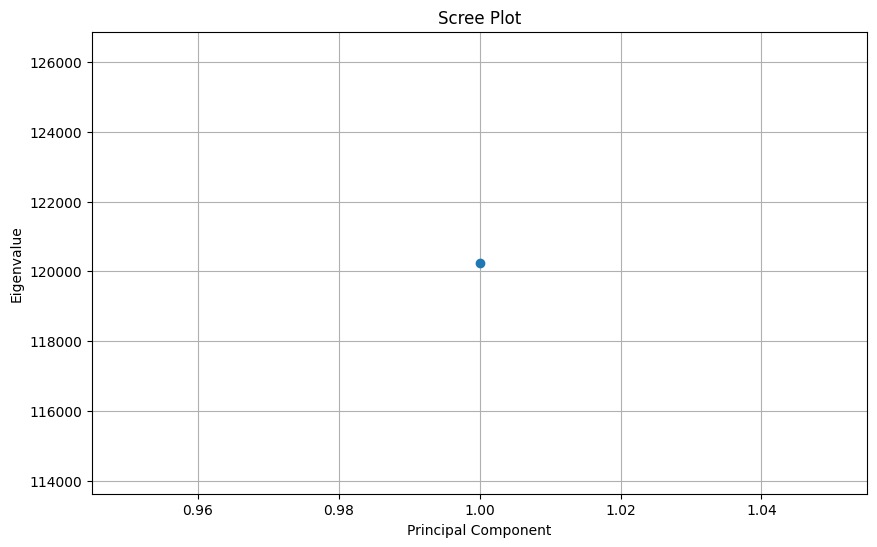

In [34]:
plot_scree(pca)

In [35]:
pca

PCA(n_components=np.int64(1))

In [36]:
pca_df

array([[-273.67542365],
       [-272.6732859 ],
       [-271.67542769],
       ...,
       [-271.67503701],
       [ 976.33697026],
       [ 977.35408384]])

In [37]:
# # Visualisasikan komponen utama yang paling baik dengan scree plot
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(sorted_eig_val) + 1), sorted_eig_val, marker='o', linestyle='--')
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Eigenvalue')
# plt.grid(True)
# plt.show()

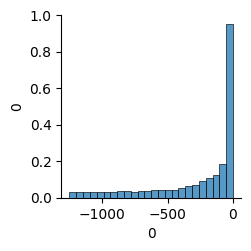

In [33]:
pca_train = pd.DataFrame(pca_df)
sns.pairplot(pca_train)

In [30]:
def kmeans(X, k, max_iters=100):
    np.random.seed(0) #menjaga agar hasil acakan tetap sama
    centroids = X[np.random.choice(X.shape[0], k, replace=False)] #memilih centroid acak
    
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2) #menghitung jarak tiap data ke centroid
        clusters = np.argmin(distances, axis=1) #mengelompokkan data ke centroid terdekat
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)]) #menghitung centroid baru dari rata-rata jarak data di tiap cluster
        if np.all(centroids == new_centroids):
            break #jika centroid tidak berubah, iterasi dihentikan
        centroids = new_centroids #mengupdate centroiid
    return clusters, centroids

In [31]:
def silhouette_score(X, labels):
    n_samples = X.shape[0] #jumlah data
    unique_labels = np.unique(labels) #mengambil nilai unik dari labels
    n_clusters = unique_labels.shape[0] #jumlah cluster
    if n_clusters == 1 or n_clusters == n_samples: #jika jumlah cluster 1 atau sama dengan jumlah data, maka tidak bisa dihitung
        return 0
    #inisialisasi nilai A dan B
    A = np.zeros(n_samples)
    B = np.zeros(n_samples)
    for i in range(n_samples):
        same_cluster = X[labels == labels[i]] #mengambil data yang sama cluster dengan data ke-i
        other_clusters = [X[labels == label] for label in unique_labels if label != labels[i]] #mengambil data yang berbeda cluster dengan data ke-i
        A[i] = np.mean(np.linalg.norm(same_cluster - X[i], axis=1)) #menghitung rata-rata jarak data ke-i dengan data di cluster yang sama
        B[i] = np.min([np.mean(np.linalg.norm(cluster - X[i], axis=1)) for cluster in other_clusters]) #menghitung rata-rata jarak data ke-i dengan data di cluster yang berbeda
    silhouette_scores = (B - A) / np.maximum(A, B) #menghitung silhouette score
    return np.mean(silhouette_scores)

In [32]:
df_train = np.array(df)

In [33]:
silhouette_scores = []

for k in range(2, 11):
    labels, _ = kmeans(pca_df, k)
    score = silhouette_score(pca_df, labels)
    silhouette_scores.append(score)

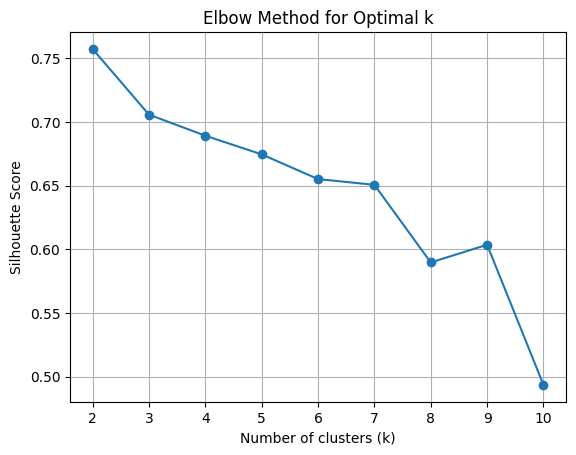

In [34]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [38]:
k = 8
labels_train, centroids_train = kmeans(pca_df, k)

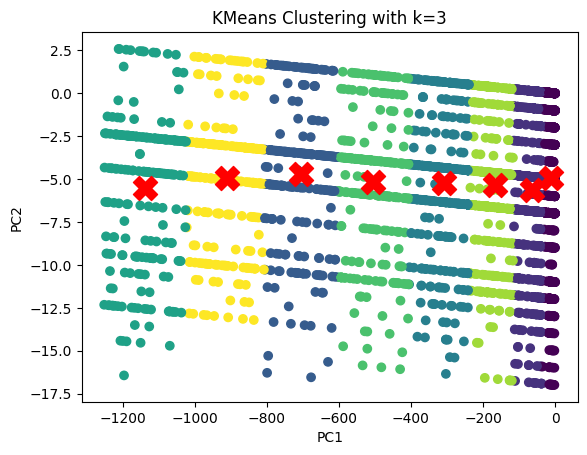

In [39]:
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=labels_train, cmap='viridis')
plt.scatter(centroids_train[:, 0], centroids_train[:, 1], s=300, c='red', marker='X')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering with k=3')
plt.show()

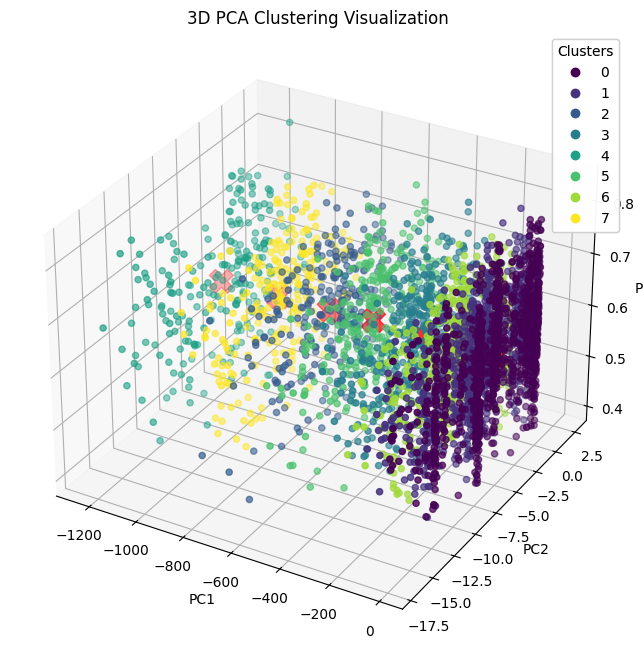

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for PCA components
scatter = ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], c=labels_train, cmap='viridis')

# Scatter plot for centroids
ax.scatter(centroids_train[:, 0], centroids_train[:, 1], centroids_train[:, 2], s=300, c='red', marker='X')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Clustering Visualization')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()